# Zip Code Analysis of Food Inspections in the Chicago Area
### Rayan Jaipuriyar
### 11/27/2023
## Introduction
This report will summarise the exploratory data analysis I conducted on a data set of Chicago area food inspections occurring between January 2010 and October 2023. My primary objectives are to conduct a spatial analysis of food inspection occurrences, identifying areas of high and low occurrences, and determining correlations between inspection frequency and other measures in the data frame. Furthermore, I aim to ascertain if more restaurants in an area significantly affect the results of inspections in that area. Answering this question will shed light on whether increased competition between restaurants has a favorable or an adverse effect on the cleanliness of establishments.

As a current resident of the city of Chicago, who benefits from the multitude eataries hosted by the city on a regular basis, the cleanliness of these establishments matters greaty to me. Furthermore, the rate of restraunt closures has been on the rise due to rising costs and the effects of Covid-19. Further avoidable exasperation of restraurant closures due to health inspections can thus be guarded against by identifying trends in the data.

I hypothasize that zip codes with more establishments, and therefore more competion, will perform worse on food inspections than establishments in zip codes with a sparcer number of establishments. I will also seek to answer if the number of establishments in a zip code is the primary determinant of the frequency of food inspections in the zip code. My approach will be zip code centered. That is, I will not be mapping each establishment for this project but will instead be centering my analysis around each zip code and comparing results intra zip code. Therefore any spatial trends in the data will have a resolution of a Chicago zip code.

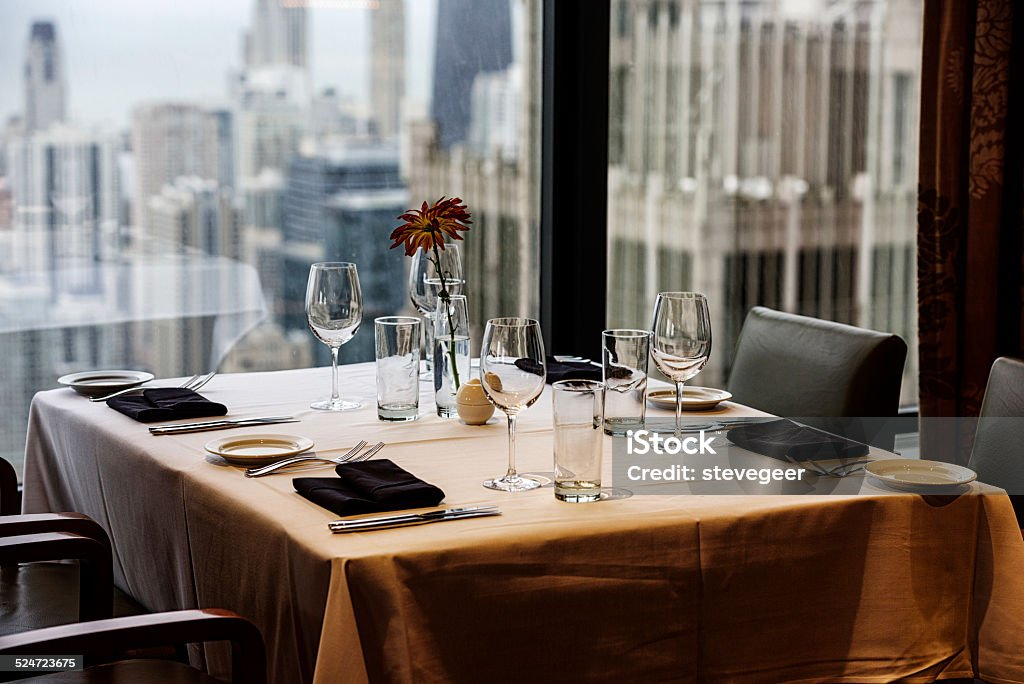

## Data Explained

The data for this project comes from the City of Chicago website: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

As stated before, the data documents inspections that have taken place in the Chicago area between January, 2010 and October, 2023. The fields countained within the final data frame are documented below:

|Column Name|Description|Data type|
|:-:        |:-:        |:-:      |
|'DBA Name'| The name under which the establishment does buisness| sting|
|'License #'| The unique id for each establishment in the data field| float|
|'Risk'| The level of risk assigned to the establishment| string|
|'Zip'| The zip code of the establishment | float|
|'Inspection Date'| The date of the inspection| string|
|'Inspection Type'| The type of inspection being conducted| string|
|'Results'| The result of the inspection|string|
|'Location'| The coordinates of the establishment| string|

Additionally, a subset of the data was created to compute the Fail % of establishments in a zip code, however since this column is only used in a subsidiary data frame and does not exist in the original, it has not been included in the data dictionary.
|Column Name|Description|Data type|
|:-:|:-:|:-:|
|'Fail %'| The percentage of failed inspections in zip codes that have more than 10 establishments recorded.|float|

Furthermore the 'Chicago area' is defined as the following by the Law Insider https://www.lawinsider.com/dictionary/chicago-area: 

The geographic area in the States of Illinois and Indiana located within a 100-mile radius of the office building presently located at One First National Plaza in Chicago, Illinois.

Specifically, for the purposes of this projects, the zip codes inspected is illustrated in the map below:

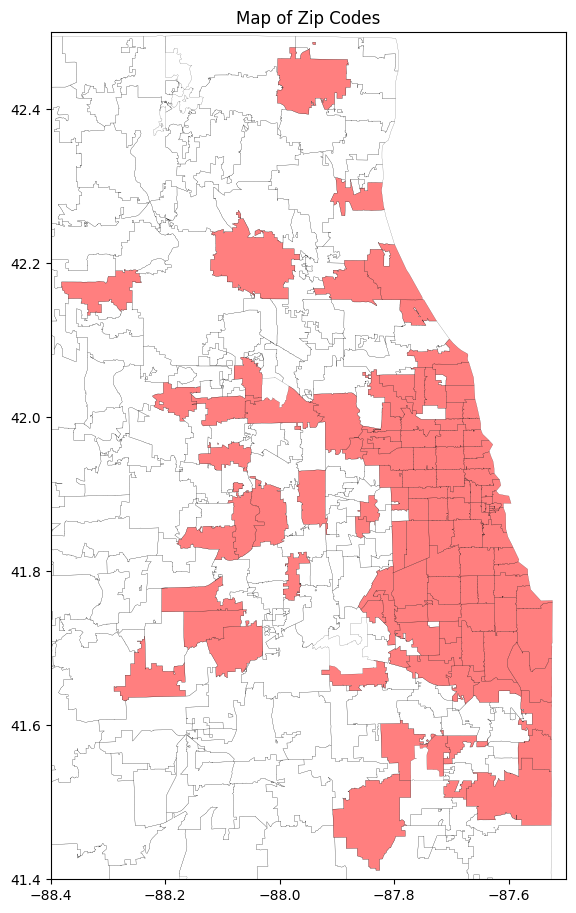

The data was cleaned by grouping inspection types, and inpsection results into broader catagories, so that there were fewer unique values for each of these fields. Missing Zip Code cases were repopulated using the coordinates from the Location field and the geopy package. Innapropriate result types, such as 'Out of Buisness' or 'Buisness not Located' were dropped and nulls that cannot be repopulated were also dropped. For more details on the specifics of data cleaning please refer to EDA Phase 1.


## Results

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

%matplotlib inline

In [2]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Loading in the data
df =  pd.read_csv('food_inspection_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260377 entries, 0 to 260376
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DBA Name         260377 non-null  object 
 1   License #        260377 non-null  float64
 2   Risk             260377 non-null  object 
 3   Address          260377 non-null  object 
 4   Zip              260377 non-null  float64
 5   Inspection Date  260377 non-null  object 
 6   Inspection Type  260377 non-null  object 
 7   Results          260377 non-null  object 
 8   Location         259491 non-null  object 
dtypes: float64(2), object(7)
memory usage: 17.9+ MB


Note that the string 'nan' values present in the location columns had been correctly interpreted as null values over the course of writing out and reading in the cleaned file. This was an oversight on my part during EDA Phase 1 because I did not take into account that the 'nan' strings would show up as non null values on a cursory inspection. I left the null values in as they were because, as stated in EDA Phase 1, I am more concerned with the Zip values than the the exact locations of each establishment. And since the corresponding zips were all populated, these cases satisfied the requirements of this projects.

### Inspection/Establishment Population Size Correlation

First I ascertained where the greatest number of inspections were happening in this data frame, and how this was affected by the number of restraurants in an area. I wished to answer if the number of inspections in a zip code were directly proportional to the number establishments present in that zip code.

To do this I constructed heat maps and a corralation matrix of the count of all zip codes present in the data frame and the count of all unique restrauratn zip codes present in the data frame.

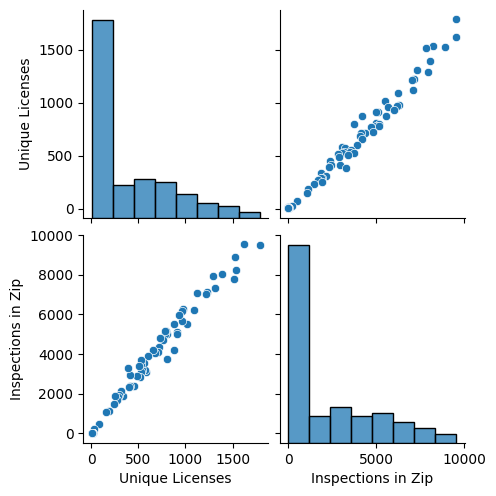

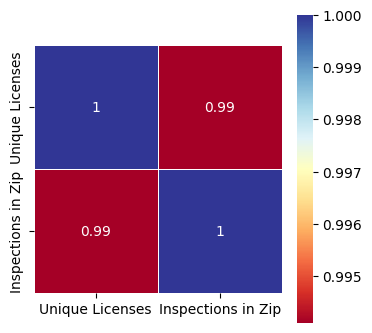

In [12]:
#Creating a dictionary with zip keys and associated license numbers
uzip = df['Zip'].unique().astype(int).astype(str)
uzipf = uzip.astype(float)
lic ={}
for zip in uzipf:
    #zipstring = str(zip)
    lic[zip] = df['License #'][df['Zip'] == zip]

#Creating a new dataframe countaining 'Zip', 'Unique Licenses'and 'Inspections in Zip'
unique_lic_count = []
for key in lic.keys():
    unique_lic_count.append(len(lic[key].unique()))
    
IinZip = []
for zip in uzipf:
    IinZip.append(len(df['Zip'][df['Zip']==zip]))

uzlcount = pd.DataFrame(columns=['Zip', 'Unique Licenses', 'Inspections in Zip'])
uzlcount['Zip'] = uzip
uzlcount['Unique Licenses'] = unique_lic_count
uzlcount['Inspections in Zip'] = IinZip
uzlcount = uzlcount.sort_values(by='Unique Licenses', ascending=False)

sns.pairplot(uzlcount[['Unique Licenses', 'Inspections in Zip']])
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(uzlcount[['Unique Licenses', 'Inspections in Zip']].corr(), square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 );

The pair plots display a highly linear relationship between the number of inspections in a zip and the number of restraurants in that zip. This further attested to by a correlation value of 0.99. This suggests that there is nothing unusual about the way inspections are being conducted in the Chicago area as the primary motivator of a zips inspection count are the number of establishments present within it. 

### Results/Establishment Population Size correlation

I then aimed to ascertain if the fail rate of restraurants was effected by the number of establishments in the zip. The goal here is to construct a fail % map over all zip codes with a sufficiently significant establishment population size over the ten year period, i.e. zip codes with less than 10 unique establishments were removed. I first constructed a subsidiary data frame that contained only the results 'Pass', 'Fail' and 'Pass w/ Conditions'. All other results are not considered as they are not valid inspections. Useing this new data frame, I constructed another data frame that sums our chosen inspection results over all unique zip codes. Finally I added the 'Fail %' column to this data frame by dividing 'Fail' field by the 'All Inspections' field.

In [18]:
#New df with only pass and fail data.
usefulL = ['Pass', 'Fail', 'Pass w/ Conditions']
ZRdf = pd.DataFrame(columns=['License #', 'Zip', 'Results'])

ZRdf['License #'] = df['License #'][df['Results'].isin(usefulL)]
ZRdf['Zip'] = df['Zip'][df['Results'].isin(usefulL)]
ZRdf['Results'] = df['Results'][df['Results'].isin(usefulL)]

#New df summing results for all unique zip codes in ZRdf
uzZRdf = ZRdf['Zip'].unique()
uZRdf = pd.DataFrame(columns=['Zip', 'All Establishments', 'Pass', 'Pass w/ Conditions', 'Fail', 'All Inspections'])

for zip in uzZRdf:
    establishments_count = len(ZRdf['License #'][ZRdf['Zip'] == zip].value_counts())
    pass_count = ZRdf['Results'][(ZRdf['Zip'] == zip) & (ZRdf['Results'] == 'Pass')].count()
    pass_conditions_count = ZRdf['Results'][(ZRdf['Zip'] == zip) & (ZRdf['Results'] == 'Pass w/ Conditions')].count()
    fail_count = ZRdf['Results'][(ZRdf['Zip'] == zip) & (ZRdf['Results'] == 'Fail')].count()

    uZRdf.loc[len(uZRdf)] = {
        'Zip': zip,
        'All Establishments': establishments_count,
        'Pass': pass_count,
        'Pass w/ Conditions': pass_conditions_count,
        'Fail': fail_count,
        'All Inspections': pass_count + pass_conditions_count + fail_count
    }
    
uZRdf['Fail %'] = (uZRdf['Fail']/uZRdf['All Inspections'])*100

#Removing zips with less than 10 Establishments & converting zip to string
uZRdf = uZRdf[uZRdf['All Establishments']>= 10]
uZRdf['Zip'] =uZRdf['Zip'].astype(int).astype(str)
uZRdf = uZRdf.sort_values(by='Fail %', ascending=False)
uZRdf.info()
uZRdf.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 33 to 26
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip                 60 non-null     object 
 1   All Establishments  60 non-null     int64  
 2   Pass                60 non-null     int64  
 3   Pass w/ Conditions  60 non-null     int64  
 4   Fail                60 non-null     int64  
 5   All Inspections     60 non-null     int64  
 6   Fail %              60 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.8+ KB


,Zip,All Establishments,Pass,Pass w/ Conditions,Fail,All Inspections,Fail %
33,60619,772,2351,684,1352,4387,30.818327
58,60827,22,120,18,60,198,30.303030


I then used heat maps of the Chicago area to compare how the 'Fail %' across zip codes compares to the establishment number across zip codes. I divided both measures into equivalent group levels. color coded them and mapped them on a Chicago area map.

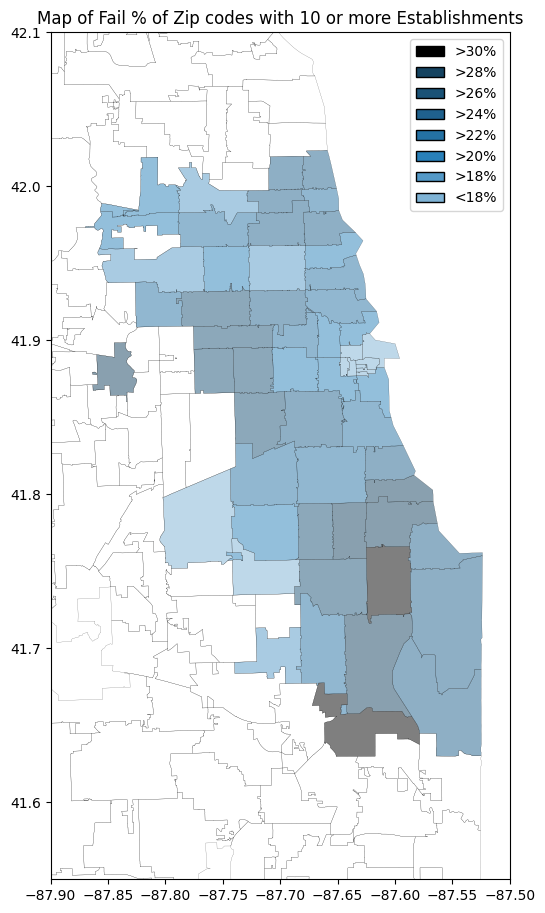

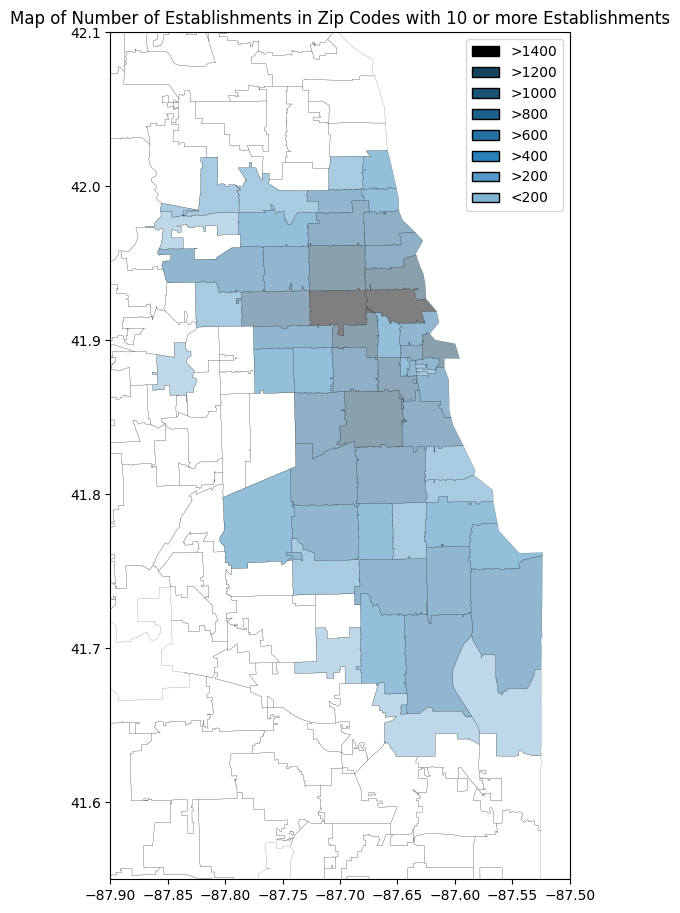

In [16]:
niner = uZRdf['Zip'][uZRdf['Fail %'] >= 30]
eightr = uZRdf['Zip'][(uZRdf['Fail %'] >= 28) & (uZRdf['Fail %'] < 30)]
sevenr = uZRdf['Zip'][(uZRdf['Fail %'] >= 26) & (uZRdf['Fail %'] < 28)]
sixr = uZRdf['Zip'][(uZRdf['Fail %'] >= 24) & (uZRdf['Fail %'] < 26)]
fiver = uZRdf['Zip'][(uZRdf['Fail %'] >= 22) & (uZRdf['Fail %'] < 24)]
fourr = uZRdf['Zip'][(uZRdf['Fail %'] >= 20) & (uZRdf['Fail %'] < 22)]
threer = uZRdf['Zip'][(uZRdf['Fail %'] >= 18) & (uZRdf['Fail %'] < 20)]
twor = uZRdf['Zip'][uZRdf['Fail %']<18]

tgdf9 = gdf[gdf['ZCTA5CE10'].isin(niner)]
tgdf8 = gdf[gdf['ZCTA5CE10'].isin(eightr)]
tgdf7 = gdf[gdf['ZCTA5CE10'].isin(sevenr)]
tgdf6 = gdf[gdf['ZCTA5CE10'].isin(sixr)]
tgdf5 = gdf[gdf['ZCTA5CE10'].isin(fiver)]
tgdf4 = gdf[gdf['ZCTA5CE10'].isin(fourr)]
tgdf3 = gdf[gdf['ZCTA5CE10'].isin(threer)]
tgdf2 = gdf[gdf['ZCTA5CE10'].isin(twor)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf9.plot(ax=ax, color='#000000', alpha=0.5)
tgdf8.plot(ax=ax, color='#154360', alpha=0.5)
tgdf7.plot(ax=ax, color='#1A5276', alpha=0.5)
tgdf6.plot(ax=ax, color='#1F618D', alpha=0.5)
tgdf5.plot(ax=ax, color='#2471A3', alpha=0.5)
tgdf4.plot(ax=ax, color='#2980B9', alpha=0.5)
tgdf3.plot(ax=ax, color='#5499C7', alpha=0.5)
tgdf2.plot(ax=ax, color='#7FB3D5', alpha=0.5)

legend_elements = [Patch(facecolor='#000000', edgecolor='black', label='>30%'),
                   Patch(facecolor='#154360', edgecolor='black', label='>28%'), 
                   Patch(facecolor='#1A5276', edgecolor='black', label='>26%'), 
                   Patch(facecolor='#1F618D', edgecolor='black', label='>24%'), 
                   Patch(facecolor='#2471A3', edgecolor='black', label='>22%'), 
                   Patch(facecolor='#2980B9', edgecolor='black', label='>20%'), 
                   Patch(facecolor='#5499C7', edgecolor='black', label='>18%'), 
                   Patch(facecolor='#7FB3D5', edgecolor='black', label='<18%')]

ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlim(-87.9, -87.5)  
ax.set_ylim(41.55, 42.1) 
plt.title("Map of Fail % of Zip codes with 10 or more Establishments");


ninee = uZRdf['Zip'][uZRdf['All Establishments'] >= 1400]
eighte = uZRdf['Zip'][(uZRdf['All Establishments'] >= 1200) & (uZRdf['All Establishments'] < 1400)]
sevene = uZRdf['Zip'][(uZRdf['All Establishments'] >= 1000) & (uZRdf['All Establishments'] < 1200)]
sixe = uZRdf['Zip'][(uZRdf['All Establishments'] >= 800) & (uZRdf['All Establishments'] < 1000)]
fivee = uZRdf['Zip'][(uZRdf['All Establishments'] >= 600) & (uZRdf['All Establishments'] < 800)]
foure = uZRdf['Zip'][(uZRdf['All Establishments'] >= 400) & (uZRdf['All Establishments'] < 600)]
threee = uZRdf['Zip'][(uZRdf['All Establishments'] >= 200) & (uZRdf['All Establishments'] < 400)]
twoe = uZRdf['Zip'][uZRdf['All Establishments']<200]

tgdf9 = gdf[gdf['ZCTA5CE10'].isin(ninee)]
tgdf8 = gdf[gdf['ZCTA5CE10'].isin(eighte)]
tgdf7 = gdf[gdf['ZCTA5CE10'].isin(sevene)]
tgdf6 = gdf[gdf['ZCTA5CE10'].isin(sixe)]
tgdf5 = gdf[gdf['ZCTA5CE10'].isin(fivee)]
tgdf4 = gdf[gdf['ZCTA5CE10'].isin(foure)]
tgdf3 = gdf[gdf['ZCTA5CE10'].isin(threee)]
tgdf2 = gdf[gdf['ZCTA5CE10'].isin(twoe)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf9.plot(ax=ax, color='#000000', alpha=0.5)
tgdf8.plot(ax=ax, color='#154360', alpha=0.5)
tgdf7.plot(ax=ax, color='#1A5276', alpha=0.5)
tgdf6.plot(ax=ax, color='#1F618D', alpha=0.5)
tgdf5.plot(ax=ax, color='#2471A3', alpha=0.5)
tgdf4.plot(ax=ax, color='#2980B9', alpha=0.5)
tgdf3.plot(ax=ax, color='#5499C7', alpha=0.5)
tgdf2.plot(ax=ax, color='#7FB3D5', alpha=0.5)

legend_elements = [Patch(facecolor='#000000', edgecolor='black', label='>1400'),
                   Patch(facecolor='#154360', edgecolor='black', label='>1200'), 
                   Patch(facecolor='#1A5276', edgecolor='black', label='>1000'), 
                   Patch(facecolor='#1F618D', edgecolor='black', label='>800'), 
                   Patch(facecolor='#2471A3', edgecolor='black', label='>600'), 
                   Patch(facecolor='#2980B9', edgecolor='black', label='>400'), 
                   Patch(facecolor='#5499C7', edgecolor='black', label='>200'), 
                   Patch(facecolor='#7FB3D5', edgecolor='black', label='<200')]

ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlim(-87.9, -87.5)  
ax.set_ylim(41.55, 42.1) 
plt.title("Map of Number of Establishments in Zip Codes with 10 or more Establishments");

From these maps it is evident that the South Side of Chicago recieve more failing results. Furthermore, it does not seem as if the number of restraurants in a zip code has any effect on the outcome of the resilts either. I then went on to use a pairplot and correlation matrix to confirm these results.

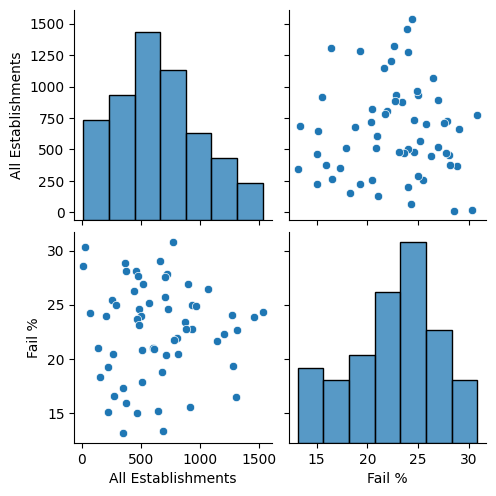

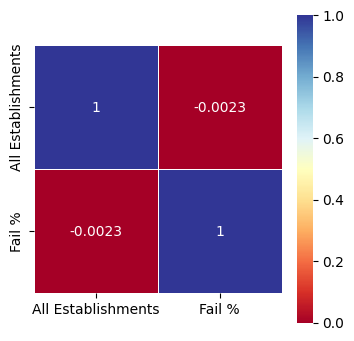

In [17]:
sns.pairplot(uZRdf[['All Establishments', 'Fail %']])
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(uZRdf[['All Establishments', 'Fail %']].corr(), square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 );

From the above plots, it appears as if there is no correlation between the amount of 'Fails' and the number of Establishments in a given zip code. The zip codes with the highest fail percentage are 60619 and 60827. The population size of establishments in these zips are very different from each other, yet both have high failure percentages. The correlation matrix shows us a number very near zero, additionally no trend can be seen in the scatter plots. It is clear that there is no correltaion between how popular a zip code is for dining purposes, and how poorly the given establishments in that zip code perform in a food inspection.

## Summary
In this report, I outline the important steps taken to clean a data frame containing food inspection results. Subsequently, I describe how I analyze the relationships among the recorded values. I make use of the geopy package to match Coordinate and Zip codes. I use this same package to creat heat maps of Chicago tracking inspections and restraurant numbers across zip codes. I confirm that there is a high correlation between the population density of establishments and the number of inspections in a zip code.

I then set out to ascertain if there was a relationship between establishment number in a given area, and the results of inspections conducted in that area. using correlation matrices and seaborn pairplots, I was unable to determine the esistance of any such relationship. Visual inspections of the Chicago area heatmaps comparing these measures agree with the stated findings.

Handiling such a large quantity of data proved to be a challenge. I was unable to rely on other software to look through this data first since Google Sheets could not handle the number of cases present in this file. So this assignment was a great way to be exposed to a purely python aproach to data cleaning.

I had outlined further steps initially in past submissions of the EDA assignment, however I never had the chance to implement them. With more time, I would like to do a time series analysis of this data to see if my findings change from year to year. Additionally, an indepth look at the zip codes in the South Side of Chicago may inform us on causes for the high Fail %. Studying the type of inspections being conducted in each zip code would be a great first step to start with for further analysis.